<a href="https://colab.research.google.com/github/jpandersen61/Machine-Learning/blob/main/Unsupervised_learning_clustering_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignments

1.   Study the steps below regarding customer segmentation on "annual income" and "spending score"
2.   Find customer segments "Age" and "Spending Score (1-100)". Repeat the steps below accordingly



#Setup

###Step 1: Setup actions

In [31]:
import pandas as pd
from pathlib import Path

from google.colab import drive

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [33]:
# extra code – this cell generates similar to figure 9–3
# plot_decision_boundaries lets us plot Voronoi diagram with model's decision boundaries
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [34]:
# extra code – this cell generates similar to Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)



In [35]:
#Mount your Google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [36]:
#Load the data for 'Mall Customers' from the GitHub
data_ref = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/main/Mall_Customers_.csv"
#dataset = pd.read_csv("drive/My Drive/Colab Notebooks/Mall_Customers.csv")
dataset = pd.read_csv(data_ref)

dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#KMeans: Find customer segments on income and spending

###Step 2: Extract and inspect the dataset

1.   Extract ‘annual income’ and ‘spending score’ in an array (numpy.ndarray) with 2 columns for each of them.
2.   Do you spot any clusters by inspecting the diagram?


In [37]:
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values


In [38]:
type(X)

numpy.ndarray

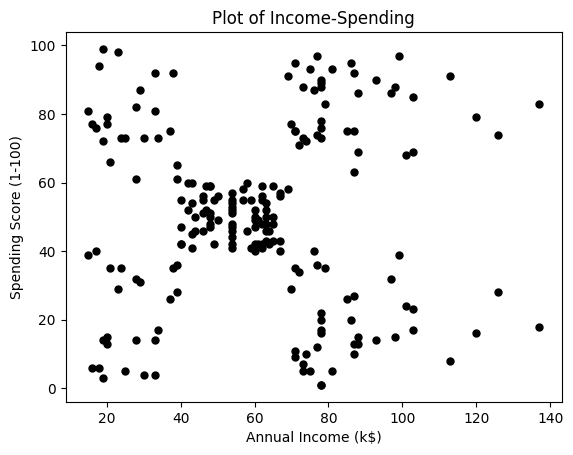

In [39]:
plt.scatter(X[:, 0], X[:, 1], s = 25, c = 'black')
plt.title('Plot of Income-Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


###Step 3: Calculate results for elbow and silhouette analysis

1.   Perform `KMeans.fit(..)` on the income-spending dataset over a range from 1 to 10 clusters.
2. Keep the silhouette scores (`silhouette_score`) in a list.


In [40]:
kmeans_per_k = [KMeans(n_init=10, n_clusters=k, init = 'k-means++', random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]


###Step 4: Determine number of clusters from inertia

1. Plot the inertia curve – inertia vs. number of clusters.
2. Analyse the curve: How many clusters does it suggest?
3. What customer segmentation would you suggest to your client?

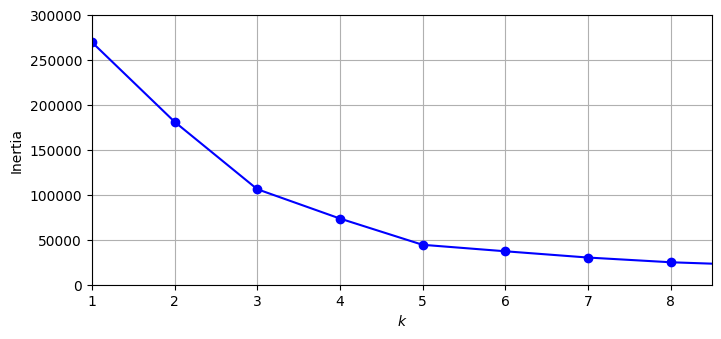

In [41]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 8.5, 0, 300000])
plt.grid()
plt.show()

###Step 5: Determine number of clusters from silhouette scores

1. Plot the curve – silhouette score vs. number of clusters.
2. Analyse the curve: How many clusters does it suggest?
3. What customer segmentation would you suggest to your client on this basis?

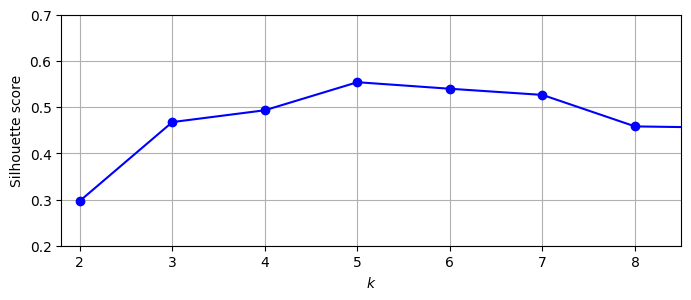

In [42]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.2, 0.7])
plt.grid()
plt.show()

###Step 6: Visualize and interpret the clusters

1. Plot the clusters – assign a color to each instance according to its’ cluster label (1, 2, 3, ….).
2. Interpret the clusters in by characterising each. You may then assign meaningful name labels
to the clusters

In [43]:
kmeans = KMeans(n_init=10, n_clusters=5, random_state=42).fit(X)


In [44]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [45]:
kmeans.inertia_

44448.4554479337

In [46]:
silhouette_score(X, kmeans.labels_)

0.553931997444648

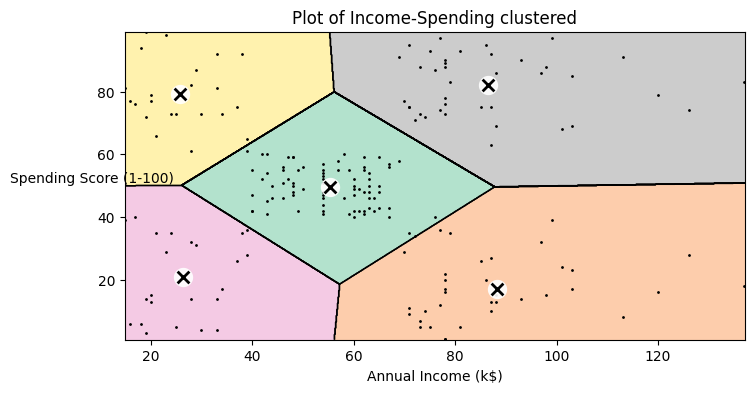

In [47]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title('Plot of Income-Spending clustered')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# DBSCAN: Density and outliers

###Step 7:  Visualize density and possible outliers

1. Perform DBSCAN on the income-spending dataset
Suggestion: Try with parameters epsilon=8, min_samples=3
2. Display clusters and outliers graphically
3. Evaluate the clusters found with KMeans in the light of the information generated with
DBSCAN

In [48]:
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values


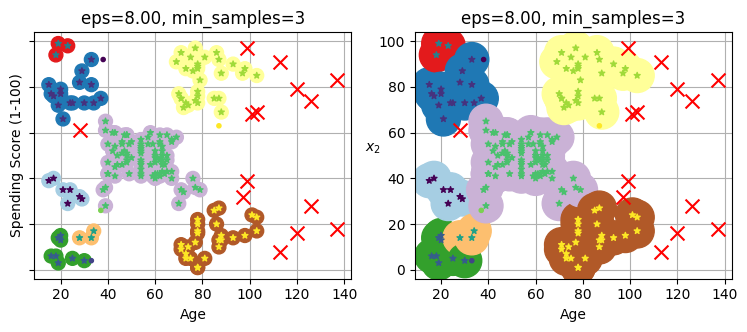

In [49]:
dbscan = DBSCAN(eps=8,min_samples=3)
dbscan.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plt.ylabel('Spending Score (1-100)')
plot_dbscan(dbscan, X, size=100, show_ylabels=False)
plt.xlabel('Age')


plt.subplot(122)

plt.ylabel('Spending Score (1-100)')
plot_dbscan(dbscan, X, size=600)
plt.xlabel('Age')

#save_fig("dbscan_plot")
plt.show()